In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import pylab
from scipy.interpolate import spline

%matplotlib inline

In [77]:
def gaussPDF(x, mean, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mean)**2 / (2 * sigma**2))

119.39999999999999 243.0 171.2
[119. 140. 160. 181. 201. 222.]


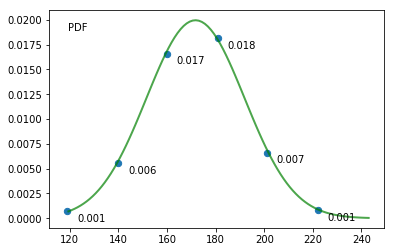

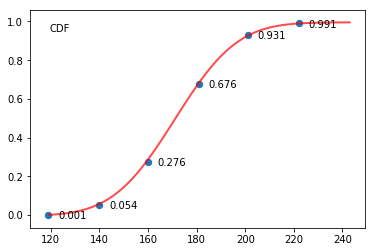

In [96]:
min_day = 199
max_day = 405
concurrent_rate = 0.4
cc_min_day = min_day * (1 - concurrent_rate)
cc_max_day = max_day * (1 - concurrent_rate)
mean_day = (cc_min_day + cc_max_day) / 2
mean_day_bias = 10;
mean_day -= mean_day_bias
standard_deviation = 20

X2 = np.zeros(6)
for i in range(len(X2)):
    X2[i] = int(cc_min_day + (cc_max_day - cc_min_day) * i / len(X2))
Y2 = np.zeros(len(X2))

print(cc_min_day, cc_max_day, mean_day)
print(X2)

def gaussDist(min_x, max_x, mean, sigma):
    numSamples = 100
    pdfs = np.zeros(numSamples)
    cdfs = np.zeros(numSamples)
    for i in range(numSamples):
        x = min_x + (max_x - min_x) * i / numSamples
        pdf = gaussPDF(x, mean, sigma)
        pdfs[i] = pdf
        if i >= 0:
            dx = (max_x - min_x) / numSamples
            cdfs[i] = cdfs[i - 1] + pdf * dx
    X = np.linspace(min_x, max_x, numSamples)
    Y = pdfs
    plt.plot(X, Y, 'g-', lw=2, alpha=0.7, label='naive')
    plt.text(X[0], np.max(Y) - 0.001, "PDF")
    for i in range(len(X2)):
        Y2[i] = Y[int(numSamples * (X2[i] - min_x) / (max_x - min_x))]     
        plt.text(X2[i] + 4, Y2[i] - 0.001, float('%.3f' % Y2[i]))
    plt.scatter(X2, Y2, s=40, cmap=plt.cm.Spectral, marker='o')
    plt.show() 
    Y = cdfs
    plt.plot(X, Y, 'r-', lw=2, alpha=0.7, label='naive')
    plt.text(X[0], np.max(Y) - 0.05, "CDF")
    for i in range(len(X2)):
        Y2[i] = Y[int(numSamples * (X2[i] - min_x) / (max_x - min_x))]     
        plt.text(X2[i] + 4, Y2[i] - 0.02, float('%.3f' % Y2[i]))
    plt.scatter(X2, Y2, s=40, cmap=plt.cm.Spectral, marker='o')
    plt.show()
gaussDist(cc_min_day, cc_max_day, mean_day, standard_deviation)  